In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeRegressor

#importando las funciones 
from sklearn.model_selection import (
    cross_val_score, KFold
)

In [5]:
if __name__ == '__main__':
    dataset = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')
    print(dataset.head(10))

       country  rank  score      high       low       gdp    family    lifexp  \
0       Norway     1  7.537  7.594445  7.479556  1.616463  1.533524  0.796667   
1      Denmark     2  7.522  7.581728  7.462272  1.482383  1.551122  0.792566   
2      Iceland     3  7.504  7.622030  7.385970  1.480633  1.610574  0.833552   
3  Switzerland     4  7.494  7.561772  7.426227  1.564980  1.516912  0.858131   
4      Finland     5  7.469  7.527542  7.410458  1.443572  1.540247  0.809158   
5  Netherlands     6  7.377  7.427426  7.326574  1.503945  1.428939  0.810696   
6       Canada     7  7.316  7.384403  7.247597  1.479204  1.481349  0.834558   
7  New Zealand     8  7.314  7.379510  7.248490  1.405706  1.548195  0.816760   
8       Sweden     9  7.284  7.344095  7.223905  1.494387  1.478162  0.830875   
9    Australia    10  7.284  7.356651  7.211349  1.484415  1.510042  0.843887   

    freedom  generosity  corruption  dystopia  
0  0.635423    0.362012    0.315964  2.277027  
1  0.626007 

In [8]:
X = dataset.drop(['country', 'score'], axis=1)
y = dataset['score']

model = DecisionTreeRegressor()
score = cross_val_score(model, X,y, scoring= 'neg_mean_squared_error')
print('imprimendo el MSE',score)
print('imprimiendo el error cuadartico medio ')

imprimendo el MSE [-0.41828777 -0.05340181 -0.0666599  -0.07808105 -0.4203554 ]
imprimiendo el error cuadartico medio 


In [9]:
#reduciendo los pliegues del parametro a 3
X = dataset.drop(['country', 'score'], axis=1)
y = dataset['score']

model = DecisionTreeRegressor()
score = cross_val_score(model, X,y, cv=3, scoring= 'neg_mean_squared_error')
print(score)

[-0.84377295 -0.1572114  -0.95626505]


In [10]:
#Condensando los valores negativos 
X = dataset.drop(['country', 'score'], axis=1)
y = dataset['score']

model = DecisionTreeRegressor()
score = cross_val_score(model, X,y, cv= 3, scoring='neg_mean_squared_error')
print(np.mean(score))

-0.5742155891293567


In [11]:
#Utilizando el valor Absoluto del score
X = dataset.drop(['country', 'score'], axis=1)
y = dataset['score']

model = DecisionTreeRegressor()
score = cross_val_score(model, X,y, cv= 3, scoring='neg_mean_squared_error')
print(np.abs(np.mean(score)))

0.6518925455658521


Todo lo anterior es la forma mas basica de implementar el cross_Validation

In [12]:
#funcion de cross_validations de fondo 

kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train, test in kf.split(dataset):
    print(train)
    print(test)

[  0   1   2   3   4   5   6   7   8  10  13  14  16  17  20  21  23  25
  28  32  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52
  53  54  57  58  59  61  62  63  64  67  70  71  72  73  74  77  80  83
  87  88  89  91  92  94  97  98  99 100 101 102 103 104 105 106 107 108
 110 111 112 113 114 115 116 120 121 123 125 127 128 129 130 132 134 135
 136 139 140 143 144 145 146 148 149 150 151 152 154]
[  9  11  12  15  18  19  22  24  26  27  29  30  31  36  42  45  51  55
  56  60  65  66  68  69  75  76  78  79  81  82  84  85  86  90  93  95
  96 109 117 118 119 122 124 126 131 133 137 138 141 142 147 153]
[  1   2   3   6   8   9  11  12  13  14  15  17  18  19  20  21  22  24
  26  27  29  30  31  36  37  38  42  45  48  50  51  52  54  55  56  57
  58  59  60  63  65  66  68  69  71  72  74  75  76  78  79  81  82  83
  84  85  86  87  88  89  90  91  92  93  95  96  99 100 102 103 106 107
 109 112 115 116 117 118 119 120 121 122 124 126 128 129 130 131 132 133
 135

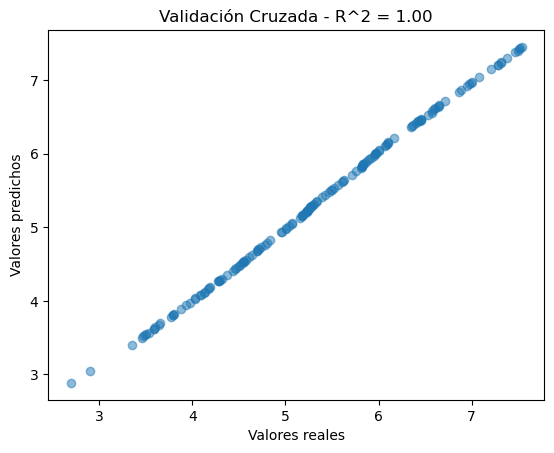

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar el conjunto de datos
data = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')

# Codificar las características categóricas (si las hay)
data = pd.get_dummies(data, columns=['country'], drop_first=True)

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['score'])
y = data['score']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada y predecir valores
predicted = cross_val_predict(model, X, y, cv=5)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, predicted)

# Graficar los resultados
plt.scatter(y, predicted, alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title(f'Validación Cruzada - R^2 = {r2:.2f}')
plt.show()



In [13]:
from sklearn.metrics import mean_squared_error


data = dataset.drop(["country","score"],axis=1)
targets = dataset["score"]

kf = KFold(n_splits=3,shuffle=True)
    
mse_values = []
for train,test in kf.split(data):
    x_train = pd.DataFrame(columns=list(data),index=range(len(train)))
    x_test = pd.DataFrame(columns=list(data),index=range(len(test)))
    y_train = pd.DataFrame(columns=['score'],index=range(len(train)))
    y_test = pd.DataFrame(columns=['score'],index=range(len(test)))
    for i in range(len(train)):
        x_train.iloc[i] = data.iloc[train[i]]
        y_train.iloc[i] = targets.iloc[train[i]]
    for j in range(len(test)):
        x_test.iloc[j] = data.iloc[test[j]]
        y_test.iloc[j] = targets.iloc[test[j]]
    model = DecisionTreeRegressor().fit(x_train,y_train)
    predict = model.predict(x_test)
    mse_values.append(mean_squared_error(y_test,predict))
    
print("Los tres MSE fueron: ",mse_values)
print("El MSE promedio fue: ", np.mean(mse_values))

Los tres MSE fueron:  [0.010611298927272037, 0.009087619016346537, 0.004679607665128524]
El MSE promedio fue:  0.0081261752029157


El score es un arreglo de errores negativos medios cuadrados (es decir, cuanto mas pequeño en valor absoluto, mejor se ajusta el modelo a los datos) como salida del coss_val_score, este resultado se da ya que el modelo fue separado cv veces (en este caso 5 al principio y luego 3) en set de datos de entrenamiento y prueba, en lo que se puede notar que particiones fueron mas satisfactorias.
Ahora al aplicar el promedio y el valor absoluto, puedes observar el error medio cuadrado promedio calculado a partir de las salidas score que evalúan la adaptación promedio del modelo a los datos.